# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')

In [5]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [6]:
print(df.shape)
print(df.head())
print(df.tail())


(10886, 19)
                     season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  \
datetime                                                              
2011-01-01 00:00:00        81        0.0       3          13     16   
2011-01-01 01:00:00        80        0.0       8          32     40   
2011-01-01 02:00:00        80        0.0       5          27     32   
2011-01-01 03:00:00        75        0.0       3          10     13   
2011-01-01 04:00:00        75       

період з 01.01.2011 до 19.12.2012

Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


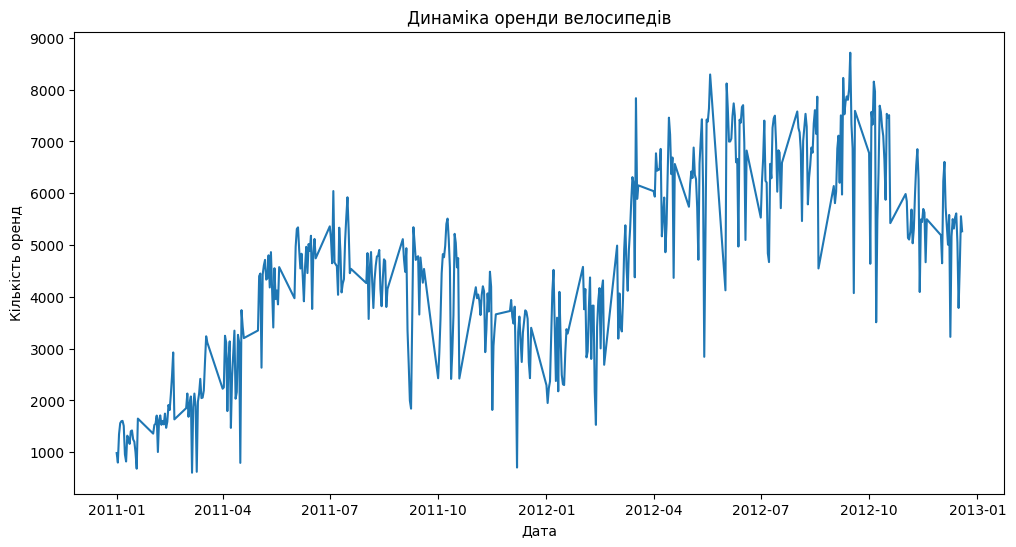

In [7]:
daily_count = df.groupby('date')['count'].sum()
daily_count.plot(figsize=(12,6), title='Динаміка оренди велосипедів')
plt.xlabel('Дата')
plt.ylabel('Кількість оренд')
plt.show()



## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [9]:
season_avg = df.groupby('season')['count'].mean()
season_avg 

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

In [10]:
season_avg.index = season_avg.index.map({1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'})
season_avg

season
Весна    116.343261
Літо     215.251372
Осінь    234.417124
Зима     198.988296
Name: count, dtype: float64

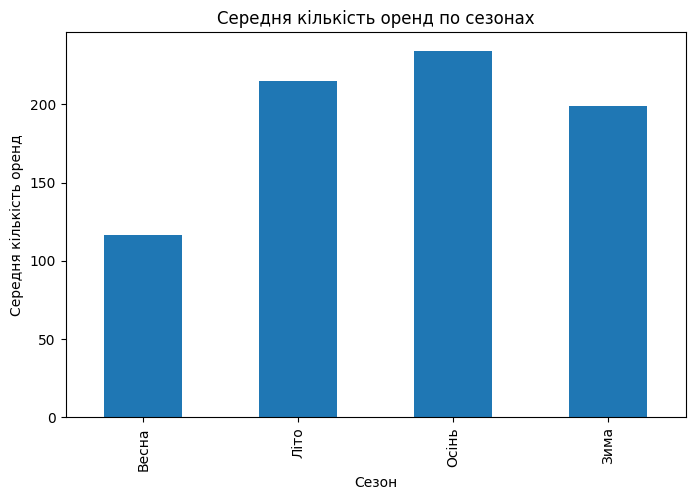

In [11]:
season_avg.plot(kind='bar', figsize=(8,5), title='Середня кількість оренд по сезонах')
plt.xlabel('Сезон')
plt.ylabel('Середня кількість оренд')
plt.show()

Осінь — лідер, найбільша кылькысть.
Літо — друге місце.
Зима — третє.
Весна — найменше оренд
Можливо навесні більше дощів і холодно 
Різниця майже в половину 

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [12]:
df['month'] = df.index.month


In [13]:
monthly_avg = df.groupby('month')['count'].mean()
monthly_avg

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

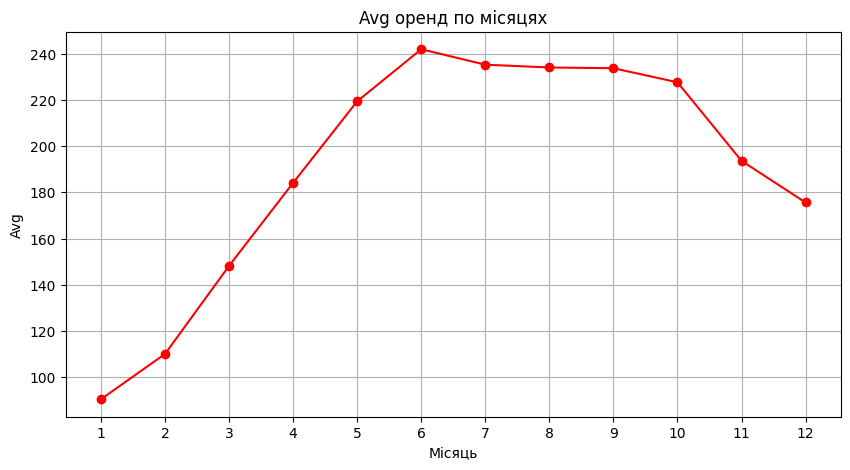

In [14]:
monthly_avg.plot(marker='o', color='red', figsize=(10,5), title='Avg оренд по місяцях')
plt.xlabel('Місяць')
plt.ylabel('Avg')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

тут вже логічно
зима - холодно - мало оренд
літо - пік

Не збігаеться з сезонами, колонка сезон не зробнена строго по датам, і, думаю,  може плавати з якого числа починаеться сезон 

Літом день довше + тепліше і кататися краще 
Опади зменшують кількість оренд + вітер, вологість, ожеледь теж не дуже зручно 

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [15]:
weather_counts = df['weather'].value_counts().sort_index()
weather_counts 

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [20]:
labels = ['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ']
colors = ['yellow', 'lightblue', 'grey', 'black']


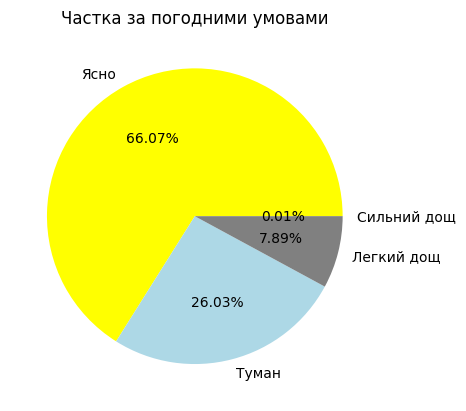

In [23]:

weather_counts.plot.pie(
    autopct='%1.2f%%',
    labels=labels,
    colors=colors,
    title='Частка за погодними умовами'
)
plt.ylabel('')
plt.show()

Ясна погода частіше 
Сильни дощ тільки 0.1%. Сагалом Тумани переважають і тількт 8% дощів
Погодні умови впливають на попит на оренду велосипедів
В ясну погоду попит є більшим 

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

In [29]:
df['weather_label'] = df['weather'].map({
    1: 'Ясно', 2: 'Туман', 3: 'Легкий дощ', 4: 'Сильний дощ'})

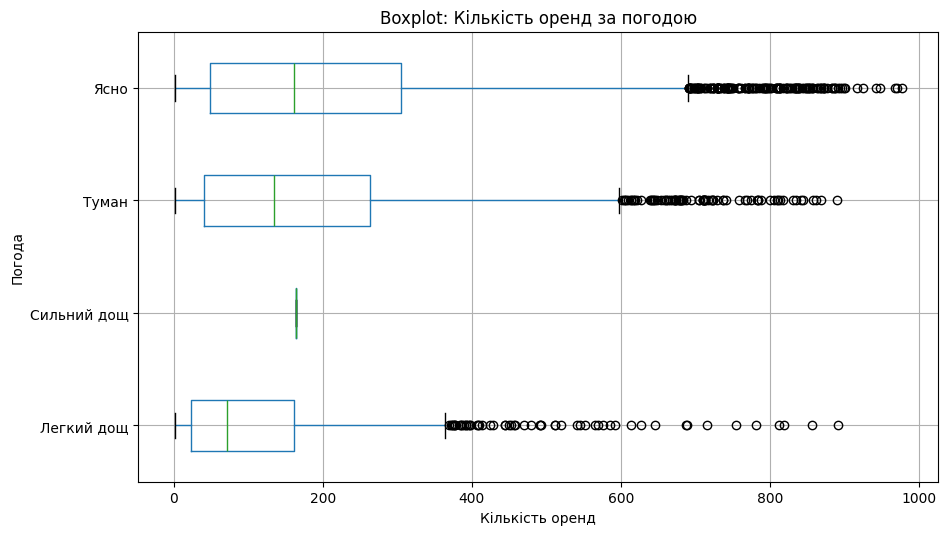

In [30]:
df.boxplot(column='count', by='weather_label', vert=False, figsize=(10,6))
plt.title('Boxplot: Кількість оренд за погодою')
plt.xlabel('Кількість оренд')
plt.ylabel('Погода')
plt.suptitle('')
plt.grid(True)
plt.show()

Ясна погода має найбільший розкид  і більше оренд. Медіана також найвища саме при ясній погоді. При тумані та легкому дощі попит менший, а при сильному дощі — майже відсутній. Є викиди при ясній погоді, скоріше це дні з високим попитом.

Очікуваний результат:

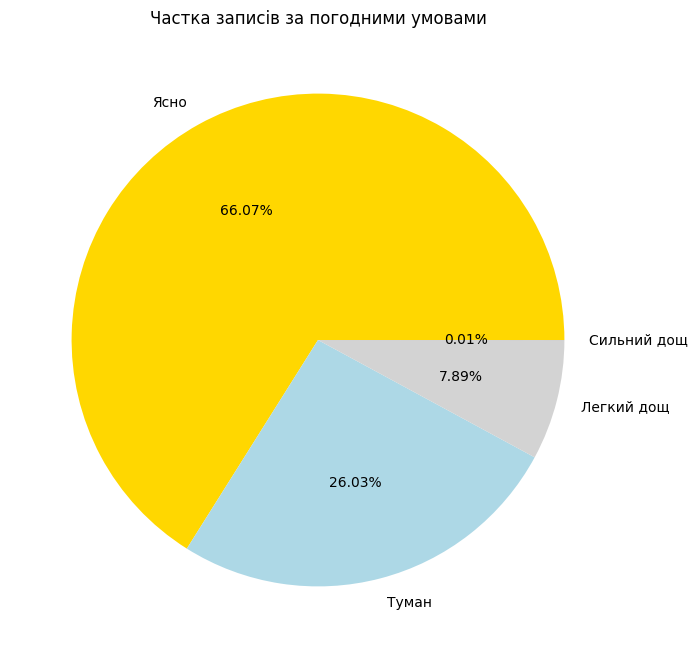

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

In [36]:
import matplotlib.pyplot as plt

In [39]:
df['season_label'] = df['season'].map({1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'})
colors = {
    'Весна': 'green',
    'Літо': 'red',
    'Осінь': 'orange',
    'Зима': 'blue'}

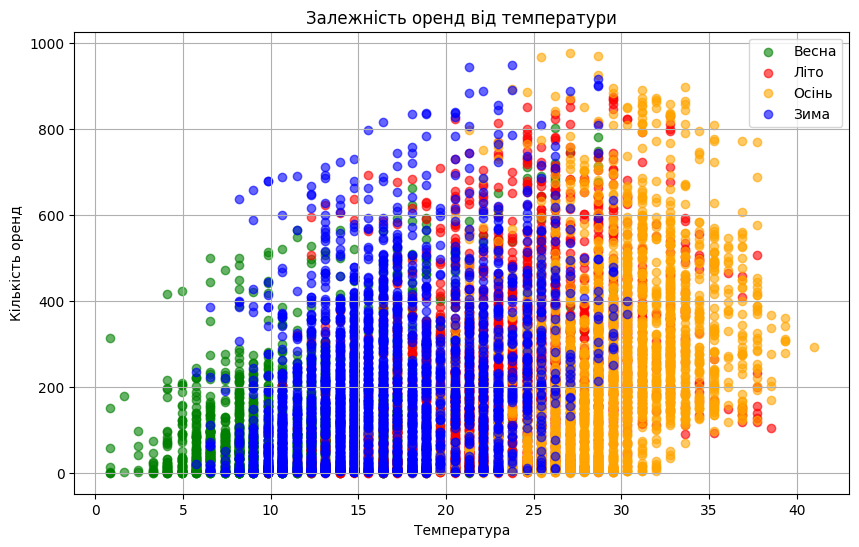

In [40]:
plt.figure(figsize=(10,6))
for season in df['season_label'].unique():
    subset = df[df['season_label'] == season]
    plt.scatter(subset['temp'], subset['count'], label=season,
                alpha=0.6, color=colors[season])
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.title('Залежність оренд від температури')
plt.legend()
plt.grid(True)
plt.show()

При зростанні температури кількість збільшується. Особливо період осінь-літо
При температурі нижче 15 і вище 35 оренд дуже мало.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

In [41]:
df['weekday_name'] = df.index.day_name()

In [47]:
user_avg = df.groupby('weekday_name')[['casual', 'registered']].mean()
user_avg 

,casual,registered
weekday_name,,
Friday,31.001962,166.842381
Monday,29.843972,160.546744
Saturday,63.625000,133.040404
Sunday,57.051298,123.788474
Thursday,24.007083,173.289118
Tuesday,22.979207,166.744639
Wednesday,22.521599,165.889749


In [48]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [49]:
user_avg = user_avg.reindex(weekday_order)

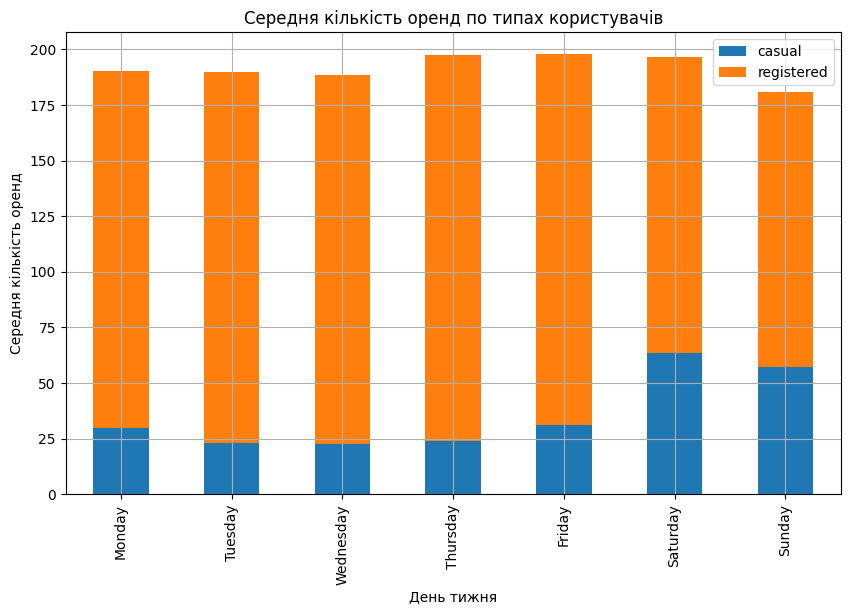

In [50]:
user_avg.plot(kind='bar', stacked=True, figsize=(10,6), title='Середня кількість оренд по типах користувачів')
plt.xlabel('День тижня')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.show()

Зареєстровані користувачі орендують більше у будні, скоріше за все, багато хто їздить на роботу на велосипедах на регулярній основі. Активніші у вихідні - це коли більше часу на відпочинок. І сім'я в парку може часто брати і катитися разом 